# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [185]:
df = pd.read_csv('b1abb33c4f.csv')

In [187]:
df.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [190]:
#separando a 
df["APGAR5"]

0        10.0
1         9.0
2        10.0
3        10.0
4        10.0
         ... 
27023     9.0
27024     9.0
27025    10.0
27026     9.0
27027     8.0
Name: APGAR5, Length: 27028, dtype: float64

In [192]:
df = pd.DataFrame({
    'APGAR5': [0.3, 4.5, 6.7, 8.1],
    'OtherColumn': [1, 2, 3, 4]
})

# Correct usage of df.loc to assign 'asfixia_grave' where APGAR5 is less than 0.3
df.loc[df['APGAR5'] < 0.3, 'YourColumn'] = 'asfixia_grave'  # Replace 'YourColumn' with the actual column name
df.loc[df['APGAR5'] == 0.3, 'YourColumn'] = 'asfixia_moderada'  # Replace 'YourColumn' with the actual column name
df.loc[df['APGAR5'] > 0.3, 'YourColumn'] = 'asfixia_leve'  # Replace 'YourColumn' with the actual column name
df.loc[df['APGAR5'] > 0.3, 'YourColumn'] = 'asfixia_normal'  # Replace 'YourColumn' with the actual column name
df

,APGAR5,OtherColumn,YourColumn
0,0.3,1,asfixia_moderada
1,4.5,2,asfixia_normal
2,6.7,3,asfixia_normal
3,8.1,4,asfixia_normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [195]:
# abrindo e fechando arquivo
file = open('b1abb33c4f.csv', 'r')
df = pd.read_csv(file)
file.close()


In [197]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

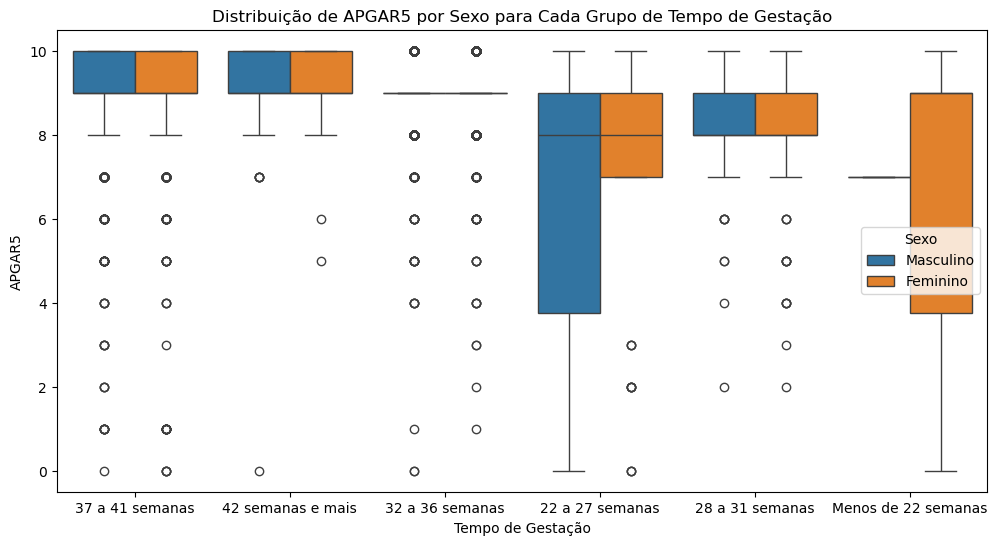

In [199]:
# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='GESTACAO', y='APGAR5', hue='SEXO')
plt.title('Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [208]:
X = df[["APGAR5","GESTACAO"]]
X

,APGAR5,GESTACAO
0,10.0,37 a 41 semanas
1,9.0,37 a 41 semanas
2,10.0,37 a 41 semanas
3,10.0,37 a 41 semanas
4,10.0,37 a 41 semanas
...,...,...
27023,9.0,32 a 36 semanas
27024,9.0,37 a 41 semanas
27025,10.0,37 a 41 semanas
27026,9.0,32 a 36 semanas


In [210]:
# Defining the DataFrame
df = pd.DataFrame(X)

# Using the pivot_table method
pivot_df = df.pivot_table(index=["APGAR5", "GESTACAO"])

print(pivot_df)

Empty DataFrame
Columns: []
Index: [(0.0, 22 a 27 semanas), (0.0, 32 a 36 semanas), (0.0, 37 a 41 semanas), (0.0, 42 semanas e mais), (0.0, Menos de 22 semanas), (1.0, 32 a 36 semanas), (1.0, 37 a 41 semanas), (2.0, 22 a 27 semanas), (2.0, 28 a 31 semanas), (2.0, 32 a 36 semanas), (2.0, 37 a 41 semanas), (2.0, Menos de 22 semanas), (3.0, 22 a 27 semanas), (3.0, 28 a 31 semanas), (3.0, 32 a 36 semanas), (3.0, 37 a 41 semanas), (4.0, 22 a 27 semanas), (4.0, 28 a 31 semanas), (4.0, 32 a 36 semanas), (4.0, 37 a 41 semanas), (5.0, 28 a 31 semanas), (5.0, 32 a 36 semanas), (5.0, 37 a 41 semanas), (5.0, 42 semanas e mais), (6.0, 22 a 27 semanas), (6.0, 28 a 31 semanas), (6.0, 32 a 36 semanas), (6.0, 37 a 41 semanas), (6.0, 42 semanas e mais), (7.0, 22 a 27 semanas), (7.0, 28 a 31 semanas), (7.0, 32 a 36 semanas), (7.0, 37 a 41 semanas), (7.0, 42 semanas e mais), (7.0, Menos de 22 semanas), (8.0, 22 a 27 semanas), (8.0, 28 a 31 semanas), (8.0, 32 a 36 semanas), (8.0, 37 a 41 semanas), (8.0, 42

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [234]:
import pandas as pd

# Suponha que 'df' seja seu DataFrame e já tenha a tabela cruzada
# df = pd.crosstab(df['GESTACAO'], df['APGAR5'])

# Exemplo de tabela cruzada para ilustrar
data = {
    'APGAR5_1': [10, 20, 30],
    'APGAR5_2': [20, 30, 10],
    'APGAR5_3': [30, 10, 20]
}
index = ['GESTACAO_1', 'GESTACAO_2', 'GESTACAO_3']
df = pd.DataFrame(data, index=index)

# Calculando os percentuais de linha
percentual_linha = df.div(df.sum(axis=1), axis=0) * 100

print(percentual_linha)


             APGAR5_1   APGAR5_2   APGAR5_3
GESTACAO_1  16.666667  33.333333  50.000000
GESTACAO_2  33.333333  50.000000  16.666667
GESTACAO_3  50.000000  16.666667  33.333333


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [236]:
# Dados de exemplo
data = {
    'APGAR5': ['Baixo', 'Baixo', 'Alto', 'Alto', 'Médio', 'Médio'],
    'GESTACAO': [36, 38, 34, 39, 35, 40]  # Semana de gestação
}
df = pd.DataFrame(data)

# Criar a coluna 'Prematuro' com base na condição de menos de 37 semanas
df['Prematuro'] = df['GESTACAO'] < 37

# Criando a tabela cruzada
cross_tab = pd.crosstab(df['Prematuro'], df['APGAR5'])

print(cross_tab)

APGAR5     Alto  Baixo  Médio
Prematuro                    
False         1      1      1
True          1      1      1


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.